# Logistic regression for a bianary classification

## 1. Load data

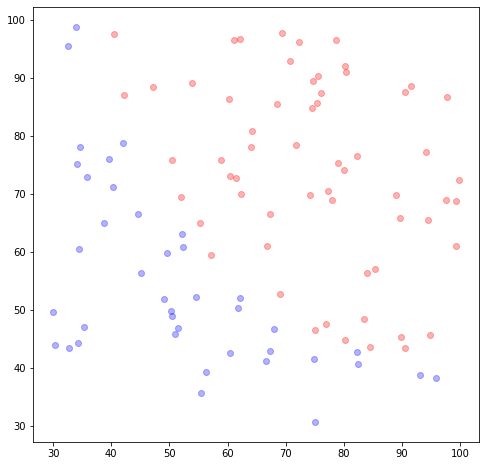

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data_path = "./drive/My Drive/Colab Notebooks/VisionAlgs/assignments/05/data.txt"
data    = np.genfromtxt(data_path, delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

## 2. Train parameters of linear regression model

In [30]:
# Defining linear model
def linear_regression(data, thetas):
  assert len(thetas) == 3, "Argument [thetas] should have 3 parameters."
  h = thetas[0] + thetas[1] * data[:,0] + thetas[2] * data[:,1]
  h_reg = 1 / (1 + np.exp(-h))
  
  return h_reg

# Training linear regression
step = 10000
lr = 1e-4
threshold = 1e-5

thetas = np.random.rand(3)
train_losses = []
params = [thetas]
for i in range(step):
  h_reg = linear_regression(data, params[-1])
  
  # Train_Loss (Objective funtion)
  train_loss = -1 * (np.mean(data[:,2] * np.log(h_reg)) + np.mean((1-data[:,2] * np.log(1-h_reg))))
  train_losses.append(train_loss)

  # Gradient Descent
  grad_0 = lr * np.mean(h_reg - data[:,2])
  grad_1 = lr * np.mean((h_reg - data[:,2]) * data[:,0])
  grad_2 = lr * np.mean((h_reg - data[:,2]) * data[:,1])

  thetas = np.array([params[-1][0] - grad_0, params[-1][1] - grad_1, params[-1][2] - grad_2])
  params.append(thetas)

  if len(train_losses) >= 2 and np.abs(train_losses[-1] - train_losses[-2]) < threshold:
    print('Learning finished at {}.'.format(i))
    break

Learning finished at 594.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


## 3. Plot the parameters of model

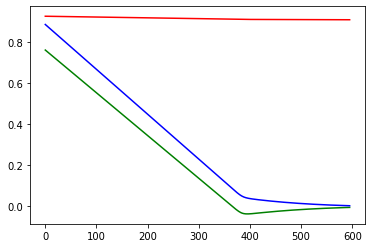

In [31]:
params = np.array(params)

plt.plot(np.arange(params.shape[0]), params[:,0], c='red')
plt.plot(np.arange(params.shape[0]), params[:,1], c='green')
plt.plot(np.arange(params.shape[0]), params[:,2], c='blue')